# Etivity 3: _Clustering & Manifold Learning_
**Student Name**: _Sean Morrissey_

**Student ID**: _17222761_

## Part 1: Imports & Dataset Setup

In [913]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mt
from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import random
pd.options.mode.chained_assignment = None  # default='warn'

In [914]:
df = pd.read_csv("./loans_train_prepared-1.csv")
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 16)


The above cell reads in the dataset csv into a pandas frame and converts it into a numpy array.

As you can see from the output, the data we are dealing with is in the shape 614 x 16 i.e. 614 rows and 16 columns.

In [915]:
colors = np.array(['lightblue', 'blue', 'lime', 'khaki', 'pink', 'green', 'purple', 'tomato', 'gold', 'brown', 'orange', 'red'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')
    
def clustering_scatterplotDBSCAN(points, labels, title):
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i-1,0],
                        points[labels==i-1,1], 
                        c=colors[i],
                        label = 'cluster '+str(i))

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

We create a function for plotting scatter plots of our clusters. This function is passed in all of the points which are plotted as dots and the centers of the clusters are plotted with stars.

We also create a function for plotting scatter plots of our clusters for **DBSCAN**. The reason for needing a separate function is due to the **DBSCAN labels** starting from **-1** instead of **0**.

## Part 2: Investigating Various K Values

In [916]:
k = 8

The original guess for k was 8. The reasoning behind this was that the dataset contained 16 columns and so my thinking was that there would be a high amount of clusters due to the high number of potential variability between the attributes.

In [917]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

Create the clustered data by fitting the data to the K means algorithm.

In [918]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

Concatenate the data and the 8 cluster centers together.

#### Multi-dimensional Scaling (MDS) for 8 Clusters

In [919]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


Get the X and Y coordinates of all the points and centers after completing manifold learning on the data and centers.

Multidimensional scaling (MDS) seeks a low-dimensional representation of the data in which the distances respect well the distances in the original high-dimensional space.

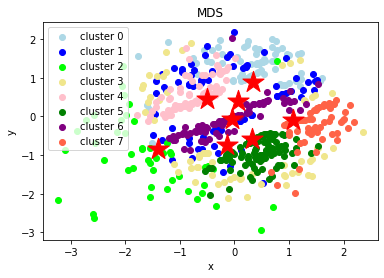

In [920]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

The plot of our data and centers using MDS with 8 clusters and k-means can be seen above.

#### t-distributed Stochastic Neighbor Embedding (t-SNE) for 8 Clusters

In [921]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


Get the X and Y coordinates of all the points and centers after completing manifold learning on the data and centers.

t-SNE (TSNE) converts affinities of data points to probabilities. The affinities in the original space are represented by Gaussian joint probabilities and the affinities in the embedded space are represented by Student’s t-distributions.

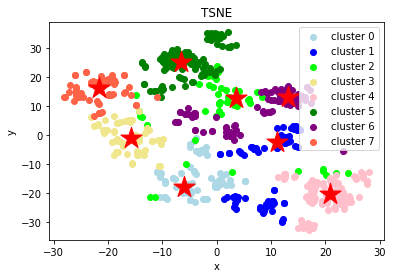

In [922]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

The plot of our data and centers using TSNE with 8 clusters and k-means can be seen above.

#### Isomap for 8 Clusters

In [923]:
XYcoordinates = manifold.Isomap(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


Get the X and Y coordinates of all the points and centers after completing manifold learning on the data and centers.

Isomap can be viewed as an extension of Multi-dimensional Scaling (MDS) or Kernel PCA. Isomap seeks a lower-dimensional embedding which maintains geodesic distances between all points.

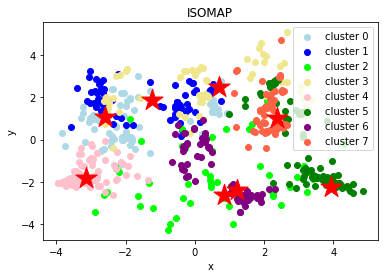

In [924]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='ISOMAP')

The plot of our data and centers using TSNE with 8 clusters and k-means can be seen above.

In [925]:
df['cluster8'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

Add the cluster labels for **K=8** to the dataframe for later inspection.

In [926]:
# Check the first 5 rows of the dataframe
df.head()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster8
0,0.000000,1.084523,1.058140,0.75,1,1,0,0,0,0,0,0,0,1,1,0.841086,7
1,0.333333,0.925883,1.047319,0.75,1,1,0,1,0,0,0,0,0,0,0,0.871711,6
2,0.000000,0.683858,0.635920,0.75,1,1,0,1,0,1,0,0,0,1,1,0.385189,5
3,0.000000,0.608992,1.002824,0.75,1,1,0,1,0,0,0,1,0,1,1,0.717012,5
4,0.000000,1.101869,1.115650,0.75,1,1,0,0,0,0,0,0,0,1,1,0.860305,7


In [927]:
# Check the last 5 rows of the dataframe
df.tail()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome,cluster8
609,0.000000,0.666409,0.676143,0.750,1,0,0,0,0,0,0,0,0,0,1,0.364708,0
610,1.000000,0.858916,0.395858,0.375,1,1,0,1,0,0,0,0,0,0,1,0.587496,6
611,0.333333,1.313719,1.566110,0.750,1,1,0,1,0,0,0,0,0,1,1,1.116075,5
612,0.666667,1.267616,1.325676,0.750,1,1,0,1,0,0,0,0,0,1,1,1.042256,5
613,0.000000,0.925883,1.074155,0.750,0,0,0,0,0,1,0,0,1,0,0,0.663523,0


#### Compute the mean value of each attribute for each cluster

In [928]:
df.groupby('cluster8').mean()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster8,,,,,,,,,,,,,,,,
0,0.094017,0.876245,0.989884,0.742949,0.897436,0.358974,0.025641,0.000000,0.025641,0.141026,0.064103,0.064103,0.820513,0.000000,0.717949,0.728429
1,0.306667,0.768975,0.959204,0.717667,0.986667,0.880000,0.000000,0.640000,0.000000,0.120000,0.066667,1.000000,0.466667,0.000000,0.746667,0.686882
2,0.361111,1.875578,1.671107,0.703125,0.833333,0.750000,0.083333,0.750000,0.000000,0.354167,0.062500,0.041667,0.291667,0.354167,0.604167,1.846064
3,0.296875,0.806441,1.029449,0.714844,0.000000,0.890625,0.046875,0.750000,0.000000,0.109375,0.015625,0.375000,0.281250,0.343750,0.000000,0.760236
4,0.271242,0.873745,1.110424,0.722304,1.000000,0.852941,0.009804,1.000000,0.000000,0.117647,0.029412,0.000000,1.000000,0.000000,0.911765,0.856940
5,0.359736,0.827794,1.044058,0.680198,0.990099,0.980198,0.000000,1.000000,0.000000,0.099010,0.059406,0.217822,0.000000,1.000000,0.811881,0.801853
6,0.226190,0.858446,1.096759,0.708036,0.976190,0.952381,0.023810,0.738095,0.000000,0.130952,0.059524,0.000000,0.000000,0.000000,0.797619,0.878851
7,0.043011,0.811069,0.882426,0.723790,0.919355,0.580645,0.016129,0.016129,0.016129,0.080645,0.064516,0.096774,0.000000,1.000000,0.629032,0.675335


#### Conclusion
By looking at the means of all of the columns for each cluster above it is clear to see:
- Cluster 2 has the largest number of dependents while cluster 7 has the lowest.
- Notably Cluster 2 also has the highest total income while cluster 7 has the lowest total income.
- Cluster 5 has the shortest loan amount term.
- All of Cluster 3 has no credit history while all of cluster 4 has a credit history
- Cluster 0 is the most female dominated cluster while cluster 5 is almost completely male.
- Cluster 4 and 6 are fully graduates from education but cluster 1 is entirely not graduates from education.
- All of cluster 3's loan status is no.

*Note that this conclusion is true for this run of k-Means. If the code is executed again, k-Means may produce either different clusters or the same clusters but in a different order.*

## Part 3: Choosing the Best Value of K

#### Elbow Criterion Method

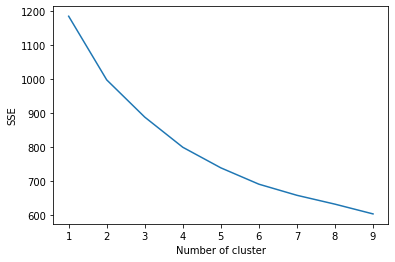

In [929]:
X = pd.read_csv("./loans_train_prepared-1.csv")
#print(X)
np_data = X[X.columns.difference(['Loan_Status_Y'])]
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(np_data)
    np_data["clusters"] = kmeans.labels_
    #print(np_data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

The elbow method aims to find an optimal value of K by plotting the **SSE** (sum of squared errors) for K-means using a range of different numbers of clusters.

As we can see from the above plot an elbow can be seen at roughly **2** and **3** but the **SSE** still remains high. An elbow can also be seen at **6** with a big drop in **SSE** from the previous number of clusters. This suggests that **6** is the optimal lowest value for **K**.

*Note that this conclusion is true for this run of k-Means. If the code is executed again, k-Means may produce either different clusters or the same clusters but in a different order.*

#### Silhouette Coefficient Method

In [981]:
df = pd.read_csv("./loans_train_prepared-1.csv")
X = np.array(df.values, dtype=float)
y = np.array(df.values, dtype=float)
best = 0
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.15345667241994654
For n_clusters=3, The Silhouette Coefficient is 0.15551634932637773
For n_clusters=4, The Silhouette Coefficient is 0.1545198330641723
For n_clusters=5, The Silhouette Coefficient is 0.1582698507624147
For n_clusters=6, The Silhouette Coefficient is 0.16202678503215284
For n_clusters=7, The Silhouette Coefficient is 0.1491088769865528
For n_clusters=8, The Silhouette Coefficient is 0.16812785496821658
For n_clusters=9, The Silhouette Coefficient is 0.1708650175456544
For n_clusters=10, The Silhouette Coefficient is 0.1702836953724961


The Silhouette Coefficient method works by computing Silhouette Coefficients for different values of K for K-means, with a higher Silhouette Coefficient score relating to a model with better-defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores: `
- The mean distance between a sample and all other points in the same class.
- The mean distance between a sample and all other points in the next nearest cluster.

From the above output we can see that the **K=6** has the largest jump from the previous value for **K** and that also the values for **K** after 6 are only marginally better, if not worse. So again the suggested value for **K** is **6**.

*Note that this conclusion is true for this run of k-Means. If the code is executed again, k-Means may produce either different clusters or the same clusters but in a different order.*

### Part 3.1: Recomputing K-Means with Different K Value

In [931]:
k = 6

In [932]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

Create the clustered data by fitting the data to the K means algorithm.

In [933]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

Concatenate the data and the 6 cluster centers together.

#### Multi-dimensional Scaling (MDS) for 6 Clusters

In [934]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


Get the X and Y coordinates of all the points and centers after completing manifold learning on the data and centers.


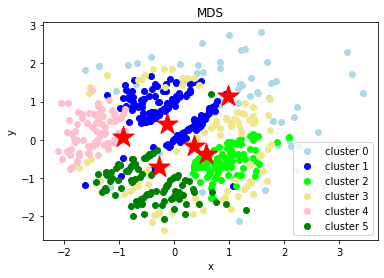

In [935]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

As we can see from the above plot the use of 6 clusters gives us a better looking plot/result than using 8 as there is less of an overlap between clusters.

#### t-distributed Stochastic Neighbor Embedding (t-SNE) for 6 Clusters

In [936]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


Get the X and Y coordinates of all the points and centers after completing manifold learning on the data and centers.


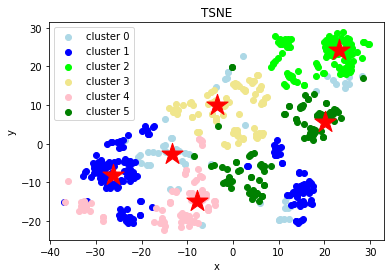

In [937]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

As we can see from the above plot the use of 6 clusters gives us a better looking plot/result than using 8 as there is less of an overlap between clusters.

#### Isomap for 6 Clusters

In [938]:
XYcoordinates = manifold.Isomap(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


Get the X and Y coordinates of all the points and centers after completing manifold learning on the data and centers.


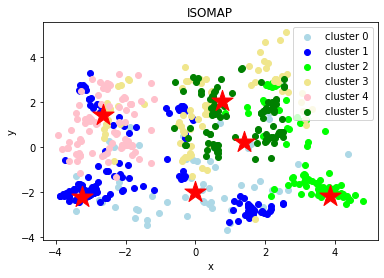

In [939]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='ISOMAP')

As we can see from the above plot the use of 6 clusters gives us a better looking plot/result than using 8 as there is less of an overlap between clusters.

In [940]:
df['cluster6'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

Add the cluster labels for **K=6** to the dataframe for later inspection.

#### Compute the mean value of each attribute for each cluster

In [941]:
df.groupby('cluster6').mean()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster6,,,,,,,,,,,,,,,,
0,0.386905,1.813192,1.617293,0.707589,0.839286,0.767857,0.089286,0.696429,0.000000,0.375000,0.053571,0.035714,0.339286,0.267857,0.607143,1.774471
1,0.323353,0.837997,1.085406,0.718114,0.994012,0.976048,0.005988,1.000000,0.000000,0.131737,0.041916,0.221557,0.640719,0.000000,0.928144,0.830134
2,0.355556,0.850892,1.053945,0.682857,0.990476,0.971429,0.000000,1.000000,0.000000,0.095238,0.057143,0.209524,0.000000,1.000000,0.809524,0.821605
3,0.277778,0.788666,1.015671,0.713056,0.233333,0.833333,0.044444,0.777778,0.000000,0.077778,0.022222,0.366667,0.200000,0.288889,0.011111,0.727802
4,0.093633,0.812183,0.968430,0.717135,0.910112,0.415730,0.022472,0.191011,0.022472,0.134831,0.067416,0.213483,1.000000,0.000000,0.797753,0.710163
5,0.056075,0.828908,0.941162,0.735981,0.990654,0.644860,0.009346,0.000000,0.009346,0.093458,0.074766,0.196262,0.000000,0.523364,0.710280,0.716927


#### Conclusion
By looking at the means of all of the columns for each cluster above it is clear to see:
- Cluster 0 has the largest number of dependents while cluster 5 has the lowest.
- Notably Cluster 0 also has the highest total income while cluster 5 has the second lowest total income.
- Cluster 5 has the shortest loan amount term while cluster 1 has the highest.
- All of the cluster almost have a complete credit history (i.e. close to 1) except cluster 3 which is closer to 0.
- Cluster 4 is the most female dominated cluster while cluster 1 and 2 are almost completely male.
- Cluster 1 and 2 are all maried but cluster 5 is entirely not married.
- Cluster 3's loan status is almost all no.

*Note that this conclusion is true for this run of k-Means. If the code is executed again, k-Means may produce either different clusters or the same clusters but in a different order.*

## Part 4: Alternative Clustering Algorithm

### Part 4.1: MeanShift

In [942]:
clustered_data_sklearn = cluster.MeanShift().fit(data)

Create the clustered data by fitting the data to the **MeanShift** algorithm using default parameters.

In [943]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

Concatenate the data and the cluster centers together.

In [944]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


Get the X and Y coordinates of all the points and centers after completing manifold learning on the data and centers.


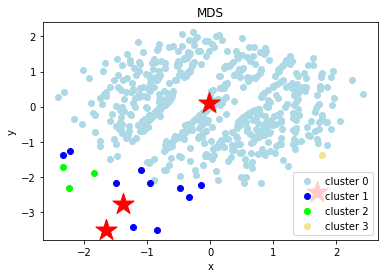

In [945]:
clustering_scatterplot(points=XYcoordinates[:-clustered_data_sklearn.cluster_centers_.shape[0],:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-clustered_data_sklearn.cluster_centers_.shape[0]:,:], 
                       title='MDS')

From the above plot we can see that **MeanShift** only returns 4 clusters with cluster 1, 2 and 3 having few data points. This shows primarily that **MeanShift** is not the most suitable alternative clustering algorithm and so we will not continue to plot the TSNE and Isomap plots nor make a conclusion about the cluster means.

### Part 4.2: DBSCAN - Density-Based Spatial Clustering of Applications with Noise

In [968]:
clustered_data_sklearn = cluster.DBSCAN(eps=0.3, min_samples = 10).fit(data)
labels = clustered_data_sklearn.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 566


Create the clustered data by fitting the data to the **DBSCAN** algorithm.

We investigate the effects of the different parameters to **DBSCAN**, with:
- `eps` = The maximum distance between two samples for one to be considered as in the neighborhood of the other.
- `min_samples` = The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.

The use of `eps=0.3` and `min_samples=10` gives us an estimate of **3 clusters** and **566 noise points** but I think we can do better.

In [969]:
clustered_data_sklearn = cluster.DBSCAN(eps=0.5, min_samples = 10).fit(data)
labels = clustered_data_sklearn.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 6
Estimated number of noise points: 455


Refitting our data with **DBSCAN** and different parameter values this time gives us a better result. As you can see from the above output the **number of clusters** is higher but the **noise points** is much lower.

In [970]:
data_and_centers = np.r_[data]

As **DBSCAN** does not return any cluster centers there is no need for us to concatenate anything onto our dataframe.

In [971]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


Get the X and Y coordinates of all the points and centers after completing manifold learning on the data and centers.


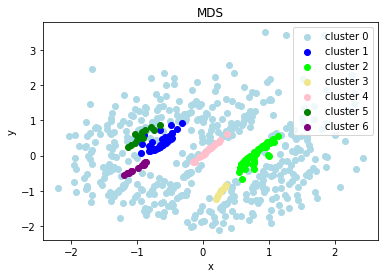

In [972]:
clustering_scatterplotDBSCAN(points=XYcoordinates, 
                       labels=clustered_data_sklearn.labels_,
                       title='MDS')

For **DBSCAN** it is important to note that data is given a -1 label if it is considered **noisy**. This explains why cluster 0 is so large in comparison to others. This data can be considered **noisy** and does not add any extra necessary information according to **DBSCAN**.

In [973]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


Get the X and Y coordinates of all the points and centers after completing manifold learning on the data and centers.


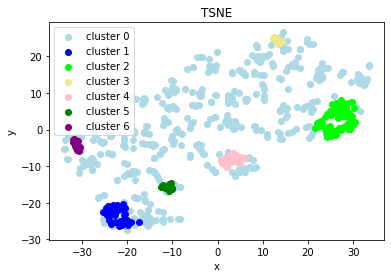

In [974]:
clustering_scatterplotDBSCAN(points=XYcoordinates, 
                       labels=clustered_data_sklearn.labels_,
                       title='TSNE')

The **noisy** data can be seen in the above plot too.

In [975]:
XYcoordinates = manifold.Isomap(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


Get the X and Y coordinates of all the points and centers after completing manifold learning on the data and centers.


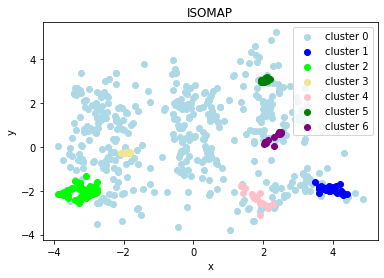

In [976]:
clustering_scatterplotDBSCAN(points=XYcoordinates, 
                       labels=clustered_data_sklearn.labels_,
                       title='ISOMAP')

The **noisy** data can be seen in the above plot too.

In [977]:
df['clusterAlternative'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

Add the cluster labels for **DBSCAN** to the dataframe for later inspection.

#### Compute the mean value of each attribute for each cluster

In [978]:
df.drop(columns="cluster6").groupby('clusterAlternative').mean()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
clusterAlternative,,,,,,,,,,,,,,,,
-1,0.257875,0.956740,1.088005,0.706319,0.804396,0.725275,0.028571,0.575824,0.006593,0.18022,0.07033,0.268132,0.349451,0.307692,0.578022,0.899168
0,0.297297,0.730528,0.978744,0.719595,1.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,1.000000,1.000000,0.679174
1,0.286458,0.873192,1.135637,0.740234,1.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.00000,0.000000,1.000000,0.000000,1.000000,0.840686
2,0.000000,0.687149,0.811895,0.737500,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,1.000000,0.000000,1.000000,0.516230
3,0.043478,0.786181,1.086357,0.733696,1.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,1.000000,0.837156
4,0.361111,0.729295,1.024337,0.718750,1.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,1.000000,1.000000,0.742304
5,0.025641,0.834571,0.882037,0.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,1.000000,1.000000,0.639195


#### Conclusion
By looking at the means of all of the columns for each cluster above it is clear to see:
- Cluster 4 has the largest number of dependents while cluster 2 has absolutely no dependents.
- Notably Cluster 2 also has the lowest total income while cluster -1 has the highest total income.
- All of the clusters loan amount terms are similar but cluster -1 has the shortest loan amount term.
- Cluster -1 is the only cluster not to have a credit history.
- Cluster -1 is also the only non completely male cluster.
- Cluster 4 is the only cluster made up of fully graduates from education, cluster 0,1,2,3,5 are fully not graduates.
- All of the clusters loan status is yes bar cluster -1

The reason behind some of the clusters having means at the boundaries is due to cluster -1, the cluster containing all the noisy data is by far the largest cluster.


*Note that this conclusion is true for this run of k-Means. If the code is executed again, k-Means may produce either different clusters or the same clusters but in a different order.*